In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import brentq, root_scalar, bisect
from scipy.integrate import quad
import math
from collections import namedtuple
from  mpl_toolkits.mplot3d import Axes3D

font = {'family': 'Computer Modern',
    'color':  'black',
    'weight': 'normal',
    'size': 16,
    }

def draw_brace(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 300./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.05*y - .01)*yspan # adjust vertical position

    ax.autoscale(False)
    ax.plot(x, y, color='black', lw=1)

    ax.text((xmax+xmin)/2., yy+.07*yspan, text, ha='center', va='bottom')

In [4]:
f_of_xC = lambda x, C: C * np.cosh((x - C * np.arccosh(1/C)) / C)

def C_split(x):
    bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))
    try: 
        rv = root_scalar(bound, x0=0.01, x1=0.02).root
        if np.isnan(rv): return 0.2*x
        else: return rv
    except ValueError: return 0.2*x
def C_high_of_xy(x, y):
    split = C_split(x)
    eq = lambda z: z * np.cosh((x- z * np.arccosh(1/z))/z) -y
    try: return brentq(eq, split, 1)
    except ValueError: return np.nan

In [5]:
x_itv = np.linspace(0.0001,1.5,15000)
z_itv = np.linspace(0.0001,1,10000)
y_itv = np.linspace(0,1,10000)

X, Z = np.meshgrid(x_itv, z_itv)

In [6]:
y_surf = lambda x, z: z * np.cosh((x- z * np.arccosh(1/z))/z)

In [7]:
Y = np.array(y_surf(np.ravel(X), np.ravel(Z))).reshape(X.shape)
Y_mask = Y <= 1

C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\1465787715.py:1: RuntimeWarning: overflow encountered in cosh
  y_surf = lambda x, z: z * np.cosh((x- z * np.arccosh(1/z))/z)


In [8]:
y_curve = np.linspace(0.0001, 1, 100)
x_curve = y_curve * np.arccosh(1/y_curve)
z_curve = []
for i in range(len(y_curve)):
    z_curve.append(C_high_of_xy(x_curve[i], y_curve[i]))

C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\2865542296.py:4: RuntimeWarning: invalid value encountered in sqrt
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))
C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\2865542296.py:4: RuntimeWarning: invalid value encountered in arccosh
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))


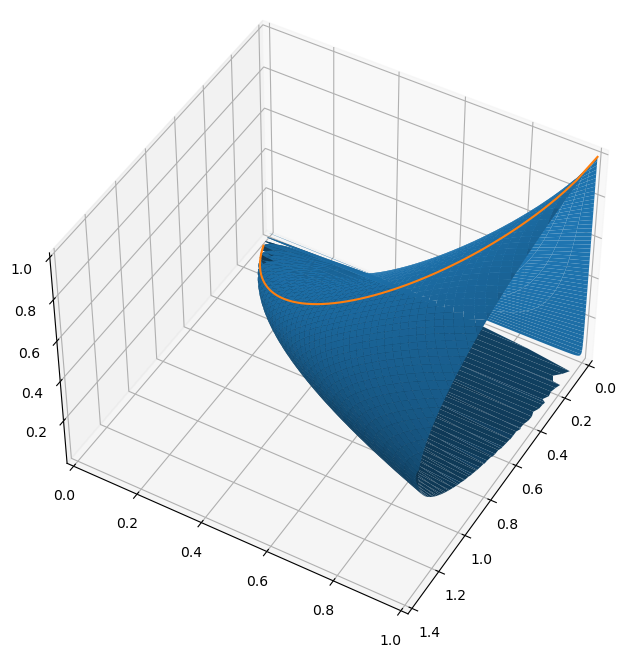

In [9]:
fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, np.where(Y_mask, Y, np.nan), Z)
#ax.contourf(X, np.where(Y_mask, Y, np.nan), Z, zdir='y', offset=0.01, cmap='coolwarm', vmin=0.01, vmax=0.99, levels=20)
#ax.plot(x_itv, np.array([C_split(x) for x in x_itv]), zs=0.01, zdir='y', zorder=22, color="k")
ax.plot(x_curve, y_curve, z_curve, zorder=200)

ax.set_ylim([0,1])
ax.set_xlim([0,1.4])
ax.view_init(45,30)
plt.show()

C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\2865542296.py:4: RuntimeWarning: invalid value encountered in sqrt
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))
C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\2865542296.py:4: RuntimeWarning: invalid value encountered in arccosh
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))


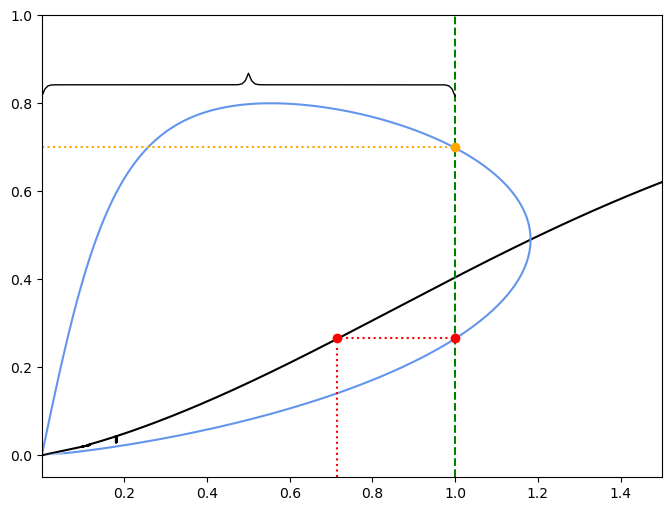

<Figure size 640x480 with 0 Axes>

In [10]:
y_const=0.8

fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot()
ax.plot(x_itv, [C_split(x) for x in x_itv], color="k")
ax.contour(X, Z, np.where(Y_mask, Y, np.nan), [y_const], colors='cornflowerblue')
ax.axvline(x=1, ymin=0, ymax=1, ls="--", color="g")
draw_brace(ax, (0,1), 0.8, "")
ax.plot(1,0.266,'ro')
ax.axhline(y=0.266, xmin=0.49, xmax=0.66, ls=":", color="r")
ax.plot(0.715,0.266,'ro')
ax.axvline(x=0.715, ymin=0, ymax=0.28, ls=":", color="r")
ax.plot(1,0.7,'o', color="orange")
ax.axhline(y=0.7, xmin=0, xmax=0.66, ls=":", color="orange")
plt.show()
plt.savefig('sample.png')

In [11]:
def C_split(x):
    bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))
    try: 
        rv = root_scalar(bound, x0=0.01, x1=0.02).root
        if np.isnan(rv): return 0.2*x
        else: return rv
    except ValueError: return 0.2*x

In [12]:
C_split(0.1)

C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\1066674497.py:2: RuntimeWarning: invalid value encountered in sqrt
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))
C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\1066674497.py:2: RuntimeWarning: invalid value encountered in arccosh
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))


0.020000000000000004

C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\1066674497.py:2: RuntimeWarning: invalid value encountered in sqrt
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))
C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\1066674497.py:2: RuntimeWarning: invalid value encountered in arccosh
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))
C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\250427028.py:5: RuntimeWarning: divide by zero encountered in true_divide
  X = Y * np.arccosh(1/Y)
C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\250427028.py:5: RuntimeWarning: invalid value encountered in multiply
  X = Y * np.arccosh(1/Y)


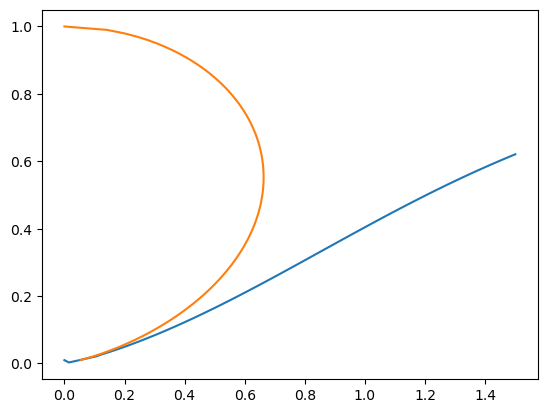

In [13]:
X = np.linspace(0, 1.5, 100)
Y = np.array([C_split(x) for x in X])
plt.plot(X, Y)
Y = np.linspace(0, 1, 100)
X = Y * np.arccosh(1/Y)
plt.plot(X, Y)

C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\1066674497.py:2: RuntimeWarning: invalid value encountered in sqrt
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))
C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\1066674497.py:2: RuntimeWarning: invalid value encountered in arccosh
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))


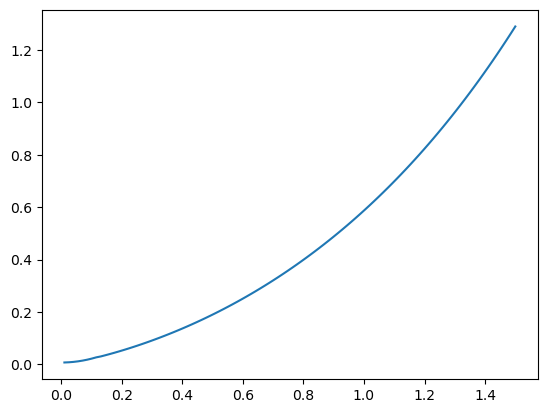

In [14]:
y_split_of_x = lambda x: f_of_xC(x, C_split(x))
X = np.linspace(0.01, 1.5, 100)
Y = np.array([y_split_of_x(x) for x in X])
plt.plot(X, Y)

In [15]:
def C_high_of_xy(x, y):
    split = C_split(x)
    eq = lambda z: z * np.cosh((x- z * np.arccosh(1/z))/z) -y
    try: return brentq(eq, split, 1)
    except ValueError: return np.nan
def C_low_of_xy(x, y):
    split = C_split(x)
    eq = lambda z: z * np.cosh((x- z * np.arccosh(1/z))/z) -y
    try: return brentq(eq, 0.00001, split)
    except ValueError: return np.nan
def C_of_xy(x, y):
    split = C_split(x)
    eq = lambda z: z * np.cosh((x- z * np.arccosh(1/z))/z) -y
    return namedtuple("C", ["low", "high", "split"])(low=brentq(eq, 0.00001, split), high=brentq(eq, split, 1), split=split)

In [16]:
d = 0.7
r = 0.5
C_high = C_high_of_xy(d, r)
C_low = C_low_of_xy(d, r)
T = np.linspace(0, d, 50)
O = np.linspace(0, 2*np.pi, 50)
t, theta = np.meshgrid(T, O)
X = t
Y_low = f_of_xC(t, C_low) * np.cos(theta)
Z_low = f_of_xC(t, C_low) * np.sin(theta)
Y_high = f_of_xC(t, C_high) * np.cos(theta)
Z_high = f_of_xC(t, C_high) * np.sin(theta)

C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\1327917222.py:8: RuntimeWarning: overflow encountered in cosh
  eq = lambda z: z * np.cosh((x- z * np.arccosh(1/z))/z) -y


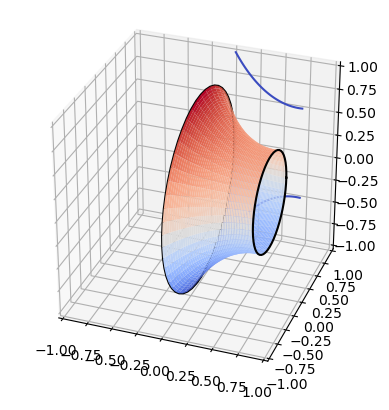

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.set_xlim3d(0, d)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.plot_surface(X, Y_high, Z_high, rstride = 1, cstride = 1,cmap="coolwarm")
ax.plot(np.cos(O), np.sin(O), zs=0, zdir="x", color="k")
ax.plot(r *np.cos(O), r*np.sin(O), zs=d, zdir="x", color="k", zorder=200)
ax.contour(X, Y_high, Z_high, offset=1, zdir="y", cmap="coolwarm", levels=[0,1])

#force aspect
limits = np.r_[ax.get_xlim3d(), ax.get_ylim3d(), ax.get_zlim3d()]
limits = [np.min(limits, axis=0), np.max(limits, axis=0)]
ax.set(xlim3d=limits, ylim3d=limits, zlim3d=limits, box_aspect=(1, 1, 1))
ax.view_init(30,-70)
plt.show()

[0.01   0.3825 0.755  1.1275 1.5   ] 0.8 [0.0006286536242036231, 0.05491673308172248, 0.15471344895544298, 0.36579420334978, nan] [0.044757588296734596, 0.7755742529804481, 0.7788419979734688, 0.6097409817694585, nan]


C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\1066674497.py:2: RuntimeWarning: invalid value encountered in sqrt
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))
C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\1066674497.py:2: RuntimeWarning: invalid value encountered in arccosh
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))
C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\1327917222.py:8: RuntimeWarning: overflow encountered in cosh
  eq = lambda z: z * np.cosh((x- z * np.arccosh(1/z))/z) -y


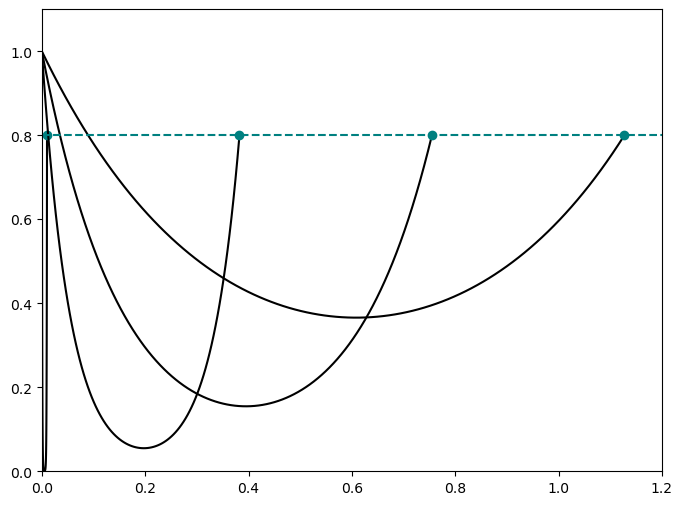

In [18]:
D = np.linspace(0.01, 1.5, 5)
r = 0.8
C_low = [C_low_of_xy(d,r) for d in D]
C_high = [C_high_of_xy(d,r) for d in D]
print(D, r, C_low, C_high)


fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot()
for d in D:
    X = np.linspace(0.00001, d, 100)
    ax.plot(X, f_of_xC(X, C_low_of_xy(d,r)), color="k")
    ax.plot(d,r,'o', color="teal") 
ax.axhline(y=r, xmin=0, xmax=1.1, ls="--", color="teal")
ax.set_ylim([0,1.1])
ax.set_xlim([0,1.2])
plt.show()

In [19]:
x0 = 1.33
y0 = 1
C_high_of_xy(x0, y0)


nan

C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\1066674497.py:2: RuntimeWarning: invalid value encountered in sqrt
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))
C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\1066674497.py:2: RuntimeWarning: invalid value encountered in arccosh
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))


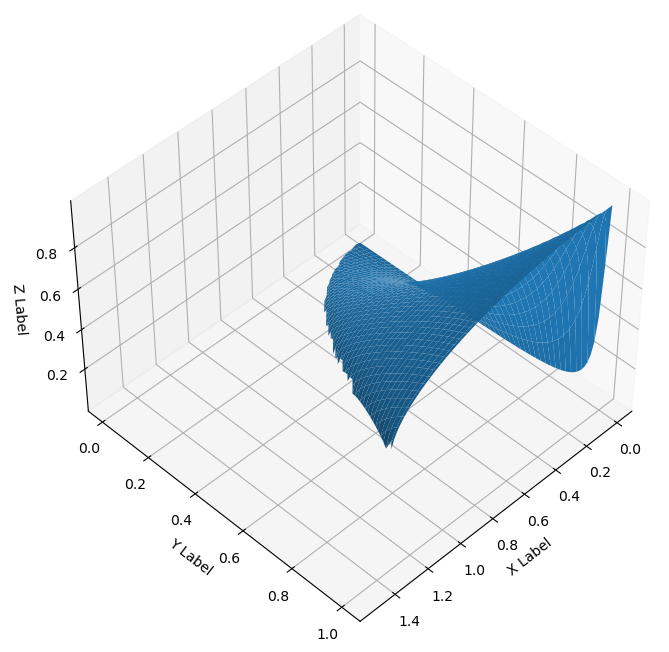

In [20]:
X, Y = np.meshgrid(np.linspace(0.01, 1.5, 100), np.linspace(0.01, 1, 100))
Z = np.array([[C_high_of_xy(x, y) for x in X[0]] for y in Y[:, 0]])


fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(45,45)
plt.show()

C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\1066674497.py:2: RuntimeWarning: invalid value encountered in sqrt
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))
C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\1066674497.py:2: RuntimeWarning: invalid value encountered in arccosh
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))
C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\1327917222.py:8: RuntimeWarning: overflow encountered in cosh
  eq = lambda z: z * np.cosh((x- z * np.arccosh(1/z))/z) -y


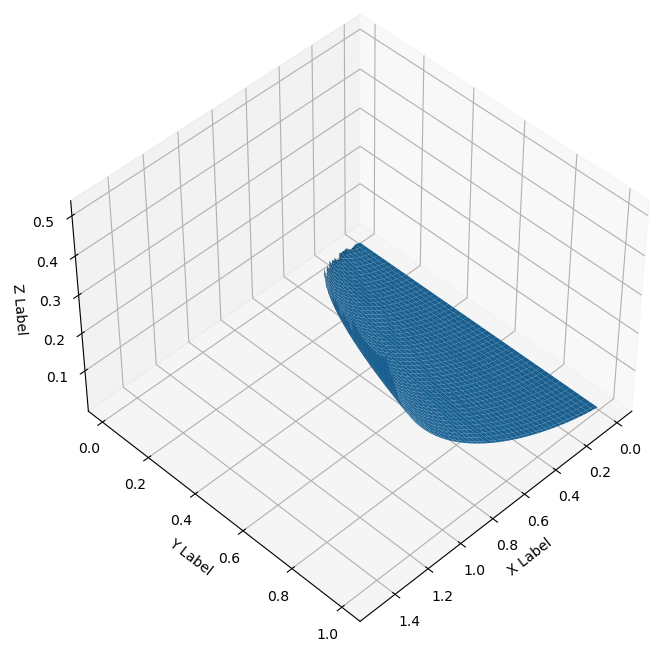

In [21]:
X, Y = np.meshgrid(np.linspace(0.01, 1.5, 100), np.linspace(0.01, 1, 100))
Z = np.array([[C_low_of_xy(x, y) for x in X[0]] for y in Y[:, 0]])


fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(45,45)
plt.show()

In [22]:
def A_high_of_xy(x, y):
    C = C_high_of_xy(x, y)
    f = lambda X: C * np.cosh((X- C * np.arccosh(1/C))/C)
    f_prime = lambda X: np.sinh((X- C * np.arccosh(1/C))/C)
    integrand = lambda X: 2* np.pi * f(X) * np.sqrt(1 + f_prime(X)**2)
    rv = quad(integrand, 0, x)[0]
    return rv
def A_low_of_xy(x, y):
    C = C_low_of_xy(x, y)
    f = lambda X: C * np.cosh((X- C * np.arccosh(1/C))/C)
    f_prime = lambda X: np.sinh((X- C * np.arccosh(1/C))/C)
    integrand = lambda X: 2* np.pi * f(X) * np.sqrt(1 + f_prime(X)**2)
    rv = quad(integrand, 0, x)[0]
    return rv

In [23]:
A_low_of_xy(0.5, 0.5)

C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\1327917222.py:8: RuntimeWarning: overflow encountered in cosh
  eq = lambda z: z * np.cosh((x- z * np.arccosh(1/z))/z) -y


4.044252664479323

In [24]:
X, Y = np.meshgrid(np.linspace(0.01, 1.5, 50), np.linspace(0.01, 1, 50))
Z_high = np.array([[A_high_of_xy(x, y) for x in X[0]] for y in Y[:, 0]])

Z_low = np.array([[A_low_of_xy(x, y) for x in X[0]] for y in Y[:, 0]])
Z_circ = np.array([[np.pi * (1+y**2) for x in X[0]] for y in Y[:, 0]])

def elementwise_min_with_nan_handling(A, B):
    # Initialize C with np.nan to handle the cases where both A and B are np.nan
    C = np.full_like(A, np.nan, dtype=np.float64)
    # Case where A is not nan and B is nan, take A
    mask_A = ~np.isnan(A) & np.isnan(B)
    C[mask_A] = A[mask_A]
    # Case where A is nan and B is not nan, take B
    mask_B = np.isnan(A) & ~np.isnan(B)
    C[mask_B] = B[mask_B]
    # Case where neither A nor B is nan, take the minimum of A and B
    mask_AB = ~np.isnan(A) & ~np.isnan(B)
    C[mask_AB] = np.minimum(A[mask_AB], B[mask_AB])
    return C

Z_min = elementwise_min_with_nan_handling(Z_high, Z_circ)

def A_eq_gold_of_y(y):
    A_rel_of_x = lambda x: A_high_of_xy(x, y) - np.pi*(1+y**2)
    try:
        rv = root_scalar(A_rel_of_x, x0=1.01*np.sqrt(y), x1=0.42*y).root
        return rv
    except ZeroDivisionError: return np.nan
    except ValueError: return np.nan
    
Y_gold = np.linspace(0.01, 1, 100)
X_gold = np.array([A_eq_gold_of_y(y) for y in Y_gold])
Z_gold = np.array([np.pi * (1+y**2) for y in Y_gold])

C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\1066674497.py:2: RuntimeWarning: invalid value encountered in sqrt
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))
C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\1066674497.py:2: RuntimeWarning: invalid value encountered in arccosh
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))
C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\11915289.py:6: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rv = quad(integrand, 0, x)[0]
C:\Users\ianua\AppData\Local\Temp\ipykernel_7936\1327917222.py:8: RuntimeWarning: overflow encountered in cosh
  eq = lambda z: z * np.cosh((x- z * np.arccosh(1/z))/z) -y
C:\Users\ianua\AppData\L

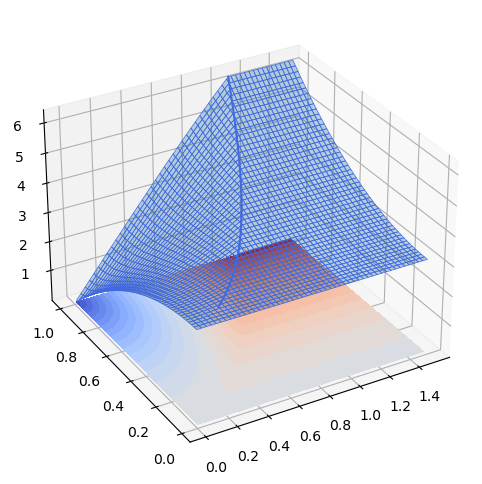

In [25]:


fig = plt.figure(figsize=[9,6])
ax = fig.add_subplot(projection='3d')
#ax.plot_surface(X, Y, Z_high, color="r")
#ax.plot_surface(X, Y, Z_low, color="g")
#ax.plot_surface(X, Y, Z_circ, color="b")
ax.plot_surface(X, Y, Z_min, edgecolor='royalblue', lw=0.5, rstride=1, cstride=1,
                alpha=0.3, zorder=200)
#ax.contour(X, Y, Z_min, zdir='y', offset=1, cmap='coolwarm', levels=5)
ax.contourf(X, Y, Z_min, zdir='z', offset=0.01, cmap='coolwarm', levels=40)
#ax.plot(X_gold, Y_gold, zs=0.01, zdir='z', color="k", zorder=100)
ax.plot(X_gold, Y_gold, Z_gold, zorder=100, color='royalblue')
#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')
ax.view_init(30,240)
plt.show()

C:\Users\ianua\AppData\Local\Temp\ipykernel_32256\1066674497.py:2: RuntimeWarning: invalid value encountered in sqrt
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))
C:\Users\ianua\AppData\Local\Temp\ipykernel_32256\1066674497.py:2: RuntimeWarning: invalid value encountered in arccosh
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))
C:\Users\ianua\AppData\Local\Temp\ipykernel_32256\11915289.py:6: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rv = quad(integrand, 0, x)[0]
C:\Users\ianua\AppData\Local\Temp\ipykernel_32256\1327917222.py:8: RuntimeWarning: overflow encountered in cosh
  eq = lambda z: z * np.cosh((x- z * np.arccosh(1/z))/z) -y
C:\Users\ianua\AppDa

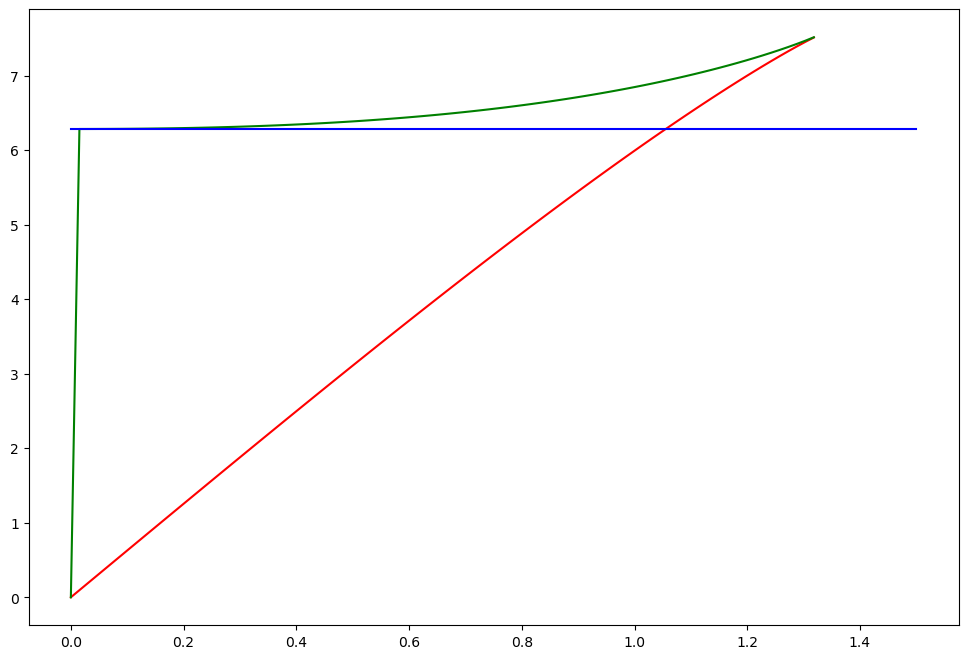

In [33]:
y0 = 1
X = np.linspace(0, 1.5, 100)
Y_high = np.array([A_high_of_xy(x, y0) for x in X])
Y_low = np.array([A_low_of_xy(x, y0) for x in X])
Y_circ = np.array([np.pi * (1+y0**2) for x in X])
fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot()
ax.plot(X, Y_high, color="r")
ax.plot(X, Y_low, color="g")
ax.plot(X, Y_circ, color="b")
#ax.view_init(0,0)
plt.show()

C:\Users\ianua\AppData\Local\Temp\ipykernel_32256\11915289.py:6: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rv = quad(integrand, 0, x)[0]
C:\Users\ianua\AppData\Local\Temp\ipykernel_32256\1066674497.py:2: RuntimeWarning: invalid value encountered in sqrt
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))
C:\Users\ianua\AppData\Local\Temp\ipykernel_32256\1066674497.py:2: RuntimeWarning: invalid value encountered in arccosh
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))


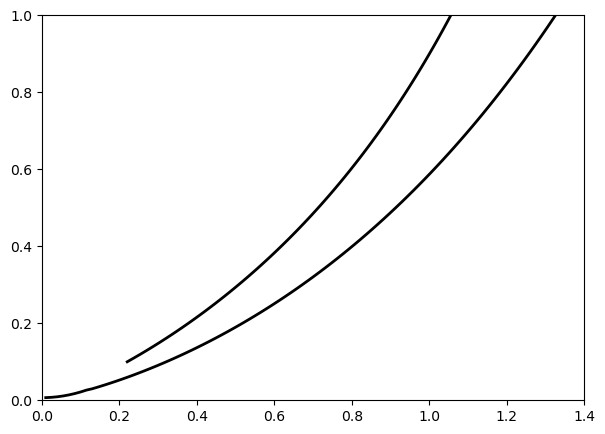

In [25]:


def A_eq_gold_of_y(y):
    A_rel_of_x = lambda x: A_high_of_xy(x, y) - np.pi*(1+y**2)
    try:
        rv = root_scalar(A_rel_of_x, x0=1.01*np.sqrt(y), x1=0.42*y).root
        return rv
    except ZeroDivisionError: return np.nan
    except ValueError: return np.nan

    
fig = plt.figure(figsize=[7,5])
ax = fig.add_subplot()
Y = np.linspace(0.01, 1, 100)
X = np.array([A_eq_gold_of_y(y) for y in Y])
ax.plot(X, Y, color="k", lw=2)
X = np.linspace(0.01, 1.5, 100)
Y = np.array([y_split_of_x(x) for x in X])
ax.set_ylim([0, 1])
ax.set_xlim([0, 1.4])
ax.plot(X, Y, color="k", lw=2)


In [26]:
def x_low_solution_of_xy(x, y):
    C = C_low_of_xy(x, y)
    left_bound = C * np.arccosh(1/C)
    eq = lambda x: 1 / np.tanh(x/C - np.arccosh(1/C)) - x/C - 1 / np.tanh(- np.arccosh(1/C))
    try:
        return brentq(eq, left_bound + 0.001, 25)
    except ValueError: 
        return np.nan
def x_high_solution_of_xy(x, y):
    C = C_high_of_xy(x, y)
    if np.isnan(C): return np.nan
    left_bound = C * np.arccosh(1/C)
    eq = lambda x: 1 / np.tanh(x/C - np.arccosh(1/C)) - x/C - 1 / np.tanh(- np.arccosh(1/C))
    try:
        return brentq(eq, left_bound + 0.001, 25)
    except ValueError: 
        return np.nan

In [27]:
x_high_solution_of_xy(1, 1)

2.4672055559162454

C:\Users\ianua\AppData\Local\Temp\ipykernel_32256\1066674497.py:2: RuntimeWarning: invalid value encountered in sqrt
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))
C:\Users\ianua\AppData\Local\Temp\ipykernel_32256\1066674497.py:2: RuntimeWarning: invalid value encountered in arccosh
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))
C:\Users\ianua\AppData\Local\Temp\ipykernel_32256\1327917222.py:8: RuntimeWarning: overflow encountered in cosh
  eq = lambda z: z * np.cosh((x- z * np.arccosh(1/z))/z) -y


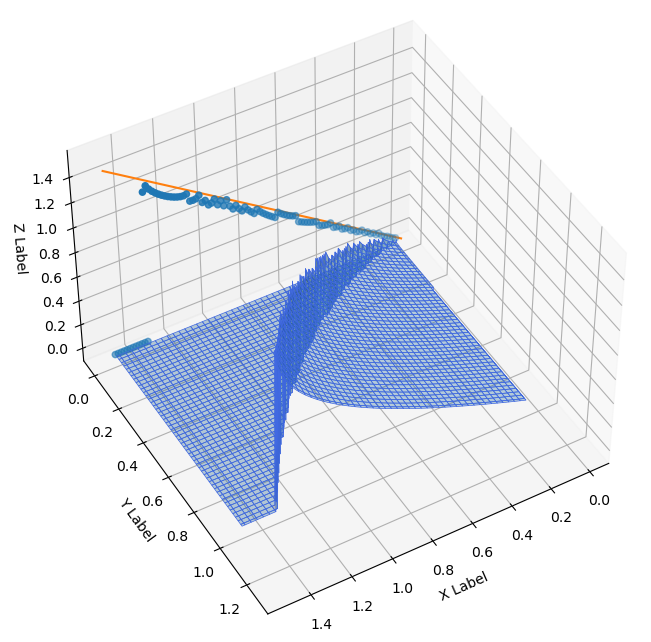

In [28]:
X, Y = np.meshgrid(np.linspace(0.01, 1.5, 100), np.linspace(0.01, 1, 100))
X_lin = np.linspace(0.01, 1.5, 100)
Y_lin = np.linspace(0.01, 1, 100)
Z_max = [max([x_low_solution_of_xy(x, y) for y in Y_lin]) for x in X_lin]

Z = np.array([[x_low_solution_of_xy(x, y) for x in X[0]] for y in Y[:, 0]])

fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, alpha=0.3)
#ax.contourf(X, Y, Z, zdir='y', offset=0, cmap='coolwarm')
ax.scatter(X_lin, Z_max, zs=0, zdir='y')
ax.plot(np.linspace(0.01, 1.5, 50), np.linspace(0.01, 1.5, 50), zs=0, zdir='y')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(45,60)
plt.show()

C:\Users\ianua\AppData\Local\Temp\ipykernel_32256\1066674497.py:2: RuntimeWarning: invalid value encountered in sqrt
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))
C:\Users\ianua\AppData\Local\Temp\ipykernel_32256\1066674497.py:2: RuntimeWarning: invalid value encountered in arccosh
  bound = lambda z: (-1 + x * np.sqrt(-1 + 1/z) * np.sqrt((1 + z)/z) - np.sqrt(-1 + 1/z) * z * np.sqrt((1 + z)/z) / np.tanh((x - z * np.arccosh(1/z))/z))


[0.022338765326986296, 0.007679744136425068, 0.00704955340419141, 0.016000501895063295, 0.014444207425048067, 0.0098392044633661, 0.021216672809544063, 0.015968226898291443, 0.0002242741353325195, 0.020804762458781434, 0.007737072620899871, 0.024269412003499607, 0.008959156885476355, 0.026058993127979768, 0.004791959479417157, 0.025658727072119913, 0.038143888722455166, 0.022045568732664222, 0.03580616519071961, 0.01157551223659442, 0.02972198495772649, 0.04200648936724277, 0.015607695086389317, 0.03199389005609732, 0.043697792919965506, 0.0037064908842312505, 0.026960502664826802, 0.03908638888740035, 0.04887386577936842, 0.0573910268480774, 0.021920007367339345, 0.033638450600364134, 0.04243184292638846, 0.04969413187448801, 0.055888625150620985, 0.06122294972081699, 0.06580007756651074, 0.009215424314505616, 0.017473291266202895, 0.021495924280508616, 0.023256058725568907, 0.023022493398810462, 0.020499365477924636, 0.014322844020389303, 0.07618922559277874, 0.07353478033352256, 0.0

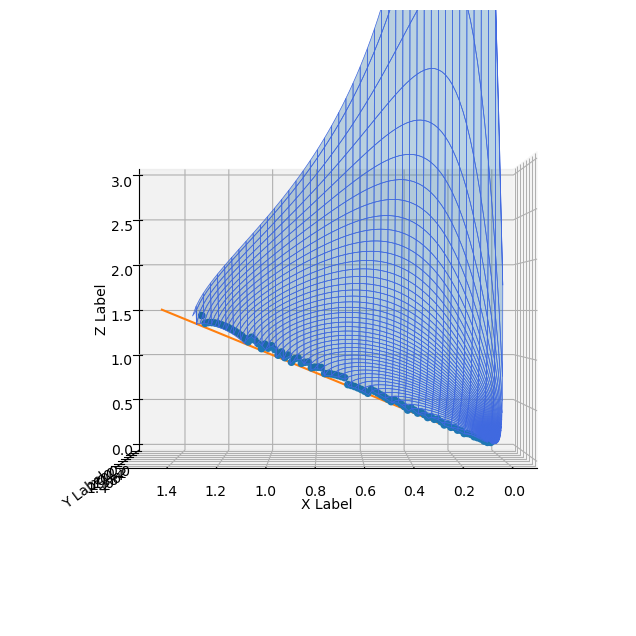

In [29]:
X, Y = np.meshgrid(np.linspace(0.01, 1.5, 100), np.linspace(0.01, 1, 100))
X_lin = np.linspace(0.01, 1.5, 100)
Y_lin = np.linspace(0.01, 1, 100)
Z_max = [min([x_high_solution_of_xy(x, y) for y in Y_lin if not np.isnan(x_high_solution_of_xy(x, y))], default=np.nan) for x in X_lin]
print(list(map(lambda x, y: x-y, Z_max, X_lin)))

Z = np.array([[x_high_solution_of_xy(x, y) for x in X[0]] for y in Y[:, 0]])

fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, alpha=0.3)
#ax.contourf(X, Y, Z, zdir='y', offset=0, cmap='coolwarm')
ax.scatter(X_lin, Z_max, zs=0, zdir='y')
ax.plot(np.linspace(0.01, 1.5, 50), np.linspace(0.01, 1.5, 50), zs=0, zdir='y')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_zlim(0, 3)
ax.view_init(0,90)
plt.show()